# Linear Regression
- Both least squares and gradient descent will be shown.
- This will be shown using two example applications.

In [72]:
import Pkg

In [73]:
using Plots
using Random

In [48]:
mutable struct LinearRegression
    slope::Union{Missing,Float64,Array{Float64,1}}
    bias::Float64
    
    function LinearRegression()
        new(missing, 0.0)
    end
end

In [49]:
# TODO: Needs to be completed for gradient descent
function predict(reg::LinearRegression, data::Union{Float64,Array{Float64,N}}) where {N}
    if typeof(data) == Float64
        # If there is only one slope variable
        return data * reg.slope + reg.bias
    elseif N == 1
        # If there are multiple weights but predicting one data point
        return data .* reg.slope .+ reg.bias
    elseif N > 1
        # Predicting multiple data points for multiple weights
        return sum(data .* reg.slope, dims=1) .+ reg.bias
    else
        error("Unknown dimension or type for prediction.")
    end
end

predict (generic function with 1 method)

In [50]:
# TODO: Needs to be completed for gradient descent
function calc_total_cost(reg::LinearRegression, data::Array{Float64,N}, labels::Array{Float64,1}) where {N}
    num_data = size(data,1)
    total_cost = (1/num_data) * sum((labels .- predict(reg, data)).^2)
    return total_cost
end

calc_total_cost (generic function with 1 method)

In [51]:
# TODO: Needs to be completed for gradient descent
function update_params(reg::LinearRegression, data::Array{Float64,N}, labels::Array{Float64,1}, lr::Float64) where {N}
    num_data = size(data,1)
    
    grad_slope = 0.0
    grad_bias  = 0.0
    
    for i=1:num_data
        error = labels[i] - predict(reg, data[i])
#         println(data[i]," ",labels[i]," ",predict(reg, data[i])," ",error)
        grad_slope = grad_slope + (error * data[i])
        grad_bias  = grad_bias  + error
    end
    
    return grad_slope, grad_bias
end

update_params (generic function with 1 method)

In [52]:
# TODO: Needs to be completed for gradient descent
function fit(reg::LinearRegression, data::Array{Float64,N}, labels::Array{Float64,1},
             iter::Int64; learning_rate::Float64=0.001) where {N}
    # Check whether the number of rows in the data and labels match
    if size(data,1) != size(labels,1)
        error("Dimensions of data ", size(data), " and labels ", size(labels), " do not match.")
    end
    
    len_data = size(data,1)
    len_vars = size(data,2)
    total_error = 0.0
    
    # Initialize the slope with the number of variables in data
    if N == 2
        println("Mistake here check data, will fill in later")
    elseif N == 1
        reg.slope = 0.0
    end
    # Initialize the bias
    reg.bias = 0.0
    
    for i=1:iter
        total_error = calc_total_cost(reg, data, labels)
        grad_slope, grad_bias = update_params(reg, data, labels, learning_rate)
        
        reg.slope = reg.slope - (grad_slope / len_data) * learning_rate
        reg.bias  = reg.bias  - (grad_bias  / len_data) * learning_rate
        if i % 5 == 0
            println("Iteration ",i," Slope: ",reg.slope, " Bias: ",reg.bias," Total Cost: ", total_error)
        end
    end
    
    # Plot the data
    plt_data = scatter(data, labels, xlabel="Frequency", ylabel="Inductance")
    plot!(plt_data, data,  predict(reg, data))
    plt_data
#     plot(plt_data, plt_error, layout=(2,1))
end

fit (generic function with 2 methods)

In [69]:
function fit(reg::LinearRegression, x::Array{Float64,N}, y::Array{Float64,1}) where {N}
    num_data = size(x,1)
    
    x_sq   = x.^2
    xy_mul = x .* y
    
    sum_x  = sum(x)
    sum_y  = sum(y)
    sum_x2 = sum(x_sq)
    sum_xy = sum(xy_mul)
    
    reg.slope = ((num_data * sum_xy) - (sum_x * sum_y)) / ((num_data * sum_x2) - sum_x^2)
    reg.bias  = (sum_y - (reg.slope * sum_x)) / num_data
    
    println("Slope: ", reg.slope)
    println("Bias: ", reg.bias)
end

fit (generic function with 2 methods)

## Application: Inductor Reactances
This example will use a function that is 
the reactance of an inductor when a
AC signal is sent and calculated for a given frequency.

In [68]:
# For a constant inductance L calculte reactance for the given frequencies
# Params:
# f - Frequency range being analyzed
# L - Inductance of the inductor used
# Returns:
# Reactances calculated using inductance and frequencies
# and added biases simulating real life noisy data
function calc_inductor_reactance(f::Array{Float64,1} , L::Float64, actual=false)
    
    if actual
        return 2 * pi * L * f
    end
    
    num_frequencies = length(f)
    random_bias_signs = bitrand(num_frequencies)
    # Generate the biases
    random_biases = rand(Float64, num_frequencies) * 5
    # Apply the randomly selected negative values
    random_biases[random_bias_signs] = random_biases[random_bias_signs] * -1.0
    return (2 * pi * L * f) + random_biases
end

calc_inductor_reactance (generic function with 2 methods)

In [70]:
# Constant value for the inductor (Henries)
L = 10 * 1e-3;

# Generate a frequency range for the transient analysis
freq_range = [0.0:20:(1e3)-1;]
frequencies = reshape(freq_range, (size(freq_range,1),))

# Get the reactances for the frequency range and inductor value
reactances = calc_inductor_reactance(frequencies, L);
println("Target mean value: ", 2 * pi * L)

Target mean value: 0.06283185307179587


Slope: 0.06176708706900145
Bias: 0.9103846336907054


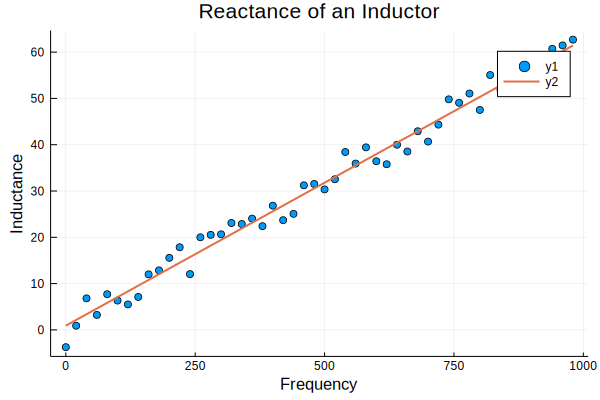

In [89]:
lr = LinearRegression()
fit(lr, frequencies, reactances)

plt_data = scatter(frequencies, reactances, xlabel="Frequency", ylabel="Inductance", title="Reactance of an Inductor")
plot!(plt_data, frequencies,  lr.slope .* frequencies .+ lr.bias, lw=2)
plt_data